In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scsavailability as scs
    
import statsmodels.api as sm
from scipy import stats

from scsavailability import features as feat, model as md, plotting as pt, results as rs

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
path = 'C:/Users/Jamie.williams/OneDrive - Newton Europe Ltd/Castle Donnington/Data/'

In [3]:
at = pd.read_csv(path+'active_totes_20201210.csv')
av = pd.read_csv(path+'Availability_with_Grey&Blue_1811-0912.csv',names = ["timestamp","Pick Station","Availability","Blue Tote Loss","Grey Tote Loss"])
#fa = pd.read_csv(path + 'scs_tote_matched.csv')
scs_raw = pd.read_csv(path + 'Faults20_11-10_12.csv')

In [4]:
at = feat.pre_process_AT(at)

Running: Function "pre_process_AT" (id=2509613860896) was called 1 times


2021-01-05 09:53:08,506 - NumExpr defaulting to 8 threads.


In [5]:
av = feat.pre_process_av(av)

Running: Function "pre_process_av" (id=2509613861760) was called 1 times


In [6]:
fa,unmapped = feat.preprocess_faults(scs_raw,remove_same_location_faults = True)

Running: Function "preprocess_faults" (id=2509613860752) was called 1 times
Running: Function "load_tote_lookup" (id=2509613862480) was called 1 times
Running: Function "load_module_lookup" (id=2509610953456) was called 1 times
Running: Function "load_ID_lookup" (id=2509613859168) was called 1 times
duplicated location faults removed - max duration kept
HOTFIX: Quadrant only faults, PTT Asset Code update


In [7]:
fa_floor = feat.floor_shift_time_fa(fa, shift=0)

C:\Users\Jamie.williams\Anaconda3\lib\site-packages\scsavailability\features.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_floor['Duration'][i] = fa_floor['Time Left'][i]
C:\Users\Jamie.williams\Anaconda3\lib\site-packages\scsavailability\features.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_floor['Duration'][i+1] = fa_floor['Duration'][i+1] - fa_floor['Duration'][i]
C:\Users\Jamie.williams\Anaconda3\lib\site-packages\scsavailability\features.py:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [39]:
df,fa_PTT = feat.create_PTT_df(fa_floor,at,av)

#df = feat.log_totes(df) 

Running: Function "load_PTT_lookup" (id=2509613861184) was called 37 times
Previous Hours Weighted
Running: Function "aggregate_availability" (id=2509613860608) was called 37 times
Running: Function "load_PTT_lookup" (id=2509613861184) was called 38 times
Previous Hours Weighted
Running: Function "aggregate_availability" (id=2509613860608) was called 38 times
Running: Function "load_PTT_lookup" (id=2509613861184) was called 39 times
Previous Hours Weighted
Running: Function "aggregate_availability" (id=2509613860608) was called 39 times
Running: Function "load_PTT_lookup" (id=2509613861184) was called 40 times
Previous Hours Weighted
Running: Function "aggregate_availability" (id=2509613860608) was called 40 times
Running: Function "load_PTT_lookup" (id=2509613861184) was called 41 times
Previous Hours Weighted
Running: Function "aggregate_availability" (id=2509613860608) was called 41 times
Running: Function "load_PTT_lookup" (id=2509613861184) was called 42 times
Previous Hours Weigh

In [13]:
X,y = md.gen_feat_var(df,target = 'Availability', features = ['Totes','Faults'])

In [37]:
X_train, X_test, y_train, y_test = md.split(X,y,split_options = {'test_size': 0.3,
                                                                 'random_state': None})


R2_cv,R2_OOS,Coeff = md.run_OLS(X_train = X_train,y_train = y_train,X_test = X_test,y_test=y_test, n = 5)

C:\Users\Jamie.williams\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Jamie.williams\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)



Cross Validation Scores: 
 
        R2 Scores
1       0.386770
2       0.361537
3       0.439187
4       0.378646
5       0.492819
Mean    0.411792
STD     0.048096
287
                                 OLS Regression Results                                
Dep. Variable:           Availability   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              955.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        11:08:46   Log-Likelihood:                          6957.6
No. Observations:               11715   AIC:                                 -1.335e+04
Df Residuals:                   11432   BIC:                                 -1.126e+04
Df Model:                         283                                                  
Covariance Type:            nonrobust 

In [38]:
R2_OOS

0.43387002126330754

In [25]:
Output = rs.create_output(fa_PTT,Coeff)

In [29]:
Output

,Alert ID,Alert,Fault ID,Asset Code,Tote Colour,Quadrant,MODULE,Original_timestamp,PTT011,PTT012,...,PTT151,PTT152,PTT171,PTT172,PTT181,PTT182,PTT191,PTT192,PTT201,PTT202
0,23727.0,SCS013: sto: timeout bin from lifter to car X:...,5105.0,SCS013,Grey,1.0,1,2020-11-20 06:42:06,0.784233,0.784233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,23721.0,SCS013: sto: timeout bin from lifter to car X:...,5105.0,SCS013,Grey,1.0,1,2020-11-20 06:42:25,1.064316,1.064316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,20641.0,SCS013: carousel: rotation area right B104 X:3...,5055.0,SCS013,Grey,1.0,1,2020-11-20 16:59:45,0.840249,0.840249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,20641.0,SCS013: carousel: rotation area right B104 X:3...,5055.0,SCS013,Grey,1.0,1,2020-11-20 17:00:00,37.083011,37.083011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,13232.0,SCS013: main switch is OFF in automaticmode X:...,5032.0,SCS013,Grey,1.0,1,2020-11-21 11:43:01,0.056017,0.056017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28833,48108.0,C14: C1404STA132 132B12 occupancy sensor fault,3416.0,C1404STA132,Blue,4.0,20,2020-11-23 10:18:49,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.638627,12.638627
28834,93375.0,C14: C1404STA132 132B12 occupancy sensor fault,3416.0,C1404STA132,Blue,4.0,20,2020-12-03 23:19:45,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.780088,1.780088
28835,144020.0,C14: C1404STA132 132B14 clearance sensor fault,3419.0,C1404STA132,Blue,4.0,20,2020-12-04 02:52:28,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.424071,1.424071
28836,150945.0,C14: C1404STA132 132B14 clearance sensor fault,3419.0,C1404STA132,Blue,4.0,20,2020-12-09 07:45:07,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.890044,0.890044


In [18]:
df

,timestamp,Availability,Blue Tote Loss,Grey Tote Loss,C05,C0501ACH011,C0501RDC004,C0501STA002,C0501STA012,C0501STA020,...,SCS202,SCS203,SCS204,SCS205,SCS206,SCSM20,C1404RDC146,C1404STA149,C14PTT202,log_totes
0,2020-11-20 00:00:00,0.816168,0.183832,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.591024
1,2020-11-20 01:00:00,0.806332,0.193668,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.482777
2,2020-11-20 02:00:00,0.314598,0.572000,0.113402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.162658
3,2020-11-20 03:00:00,0.967823,0.032177,0.000000,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.512540
4,2020-11-20 04:00:00,0.495364,0.504636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.494485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,2020-12-09 13:00:00,0.989251,0.006667,0.004083,0.0,0.0,0.0,0.0,0.0,0.0,...,342.0,168.0,0.0,428.0,0.0,37.0,0.0,0.0,0.0,3.936716
462,2020-12-09 14:00:00,0.884003,0.000000,0.115997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,305.0,288.0,1852.0,0.0,128.0,0.0,0.0,0.0,4.332048
463,2020-12-09 15:00:00,0.929763,0.004000,0.066237,0.0,0.0,0.0,0.0,0.0,0.0,...,576.0,0.0,208.0,1102.0,0.0,0.0,0.0,451.0,109.0,4.177204
464,2020-12-09 16:00:00,0.976545,0.001333,0.022121,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,546.0,183.0,0.0,0.0,0.0,0.0,5.0,4.054390


(0.0, 5.0)

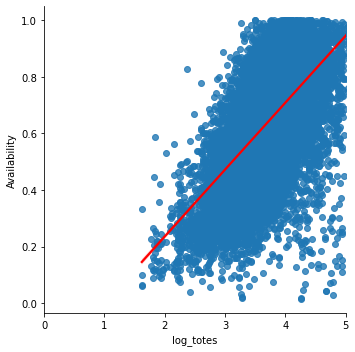

In [22]:
sns.lmplot(x='log_totes', y='Availability', data=df, line_kws={"color": "red"})
plt.xlim(0, 5)

In [28]:
df.shape

(16736, 1166)

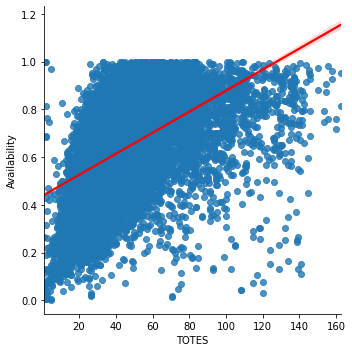

In [40]:
sns.lmplot(x='TOTES', y='Availability', data=df, line_kws={"color": "red"})

(0.0, 1.0)

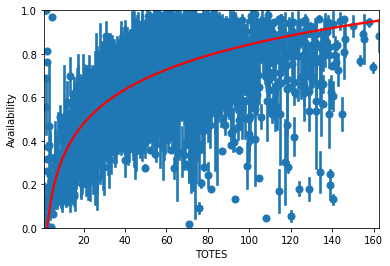

In [42]:
ax = sns.regplot(x="TOTES", y="Availability", data=df,
x_estimator=np.mean, logx=True, line_kws={"color": "red"})
plt.ylim(0,1)

In [ ]:
sns.lmplot(x='log_totes', y='Availability', data=df, line_kws={"color": "red"})
plt.xlim(0, 5)